In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

data_east=pd.read_excel('EastIndia.xlsx',names=['DateTime','PM','PM10','Temp','RH','WS','AT','State'], parse_dates=['DateTime'], na_values=['None'])
data_west=pd.read_excel('WestIndia.xlsx',names=['DateTime','PM','PM10','Temp','RH','WS','AT','State'], parse_dates=['DateTime'], na_values=['None'])
data_northeast=pd.read_excel('NorthEastIndia.xlsx',names=['DateTime','PM','PM10','Temp','RH','WS','AT','State'], parse_dates=['DateTime'], na_values=['None'])
data_central=pd.read_excel('CentralIndia.xlsx',names=['DateTime','PM','PM10','Temp','RH','WS','AT','State'], parse_dates=['DateTime'], na_values=['None'])


### Function for calculating ratio of Diwali (D) and NonDiwali(ND) hourly.

In [20]:
def ratiodata(city_names):
    Data_Ratio=pd.DataFrame([])
    Data_Final=pd.DataFrame([])
    for i in city_names:
        
        #----Extracting each city dataset as 'da'---
        da = pd.read_excel('data_seperated.xlsx', sheet_name= i)
        da['DateTime'] = pd.to_datetime(da['DateTime'],format='%d-%m-%Y %H:%M') # Assigning 'DateTime' column as pd.datetime
        da['Hour'] = pd.DatetimeIndex(da['DateTime']).hour # Adding Hour column
        da['Day'] = pd.DatetimeIndex(da['DateTime']).day # Adding day column
        
        
        #----Defining Diwali, Pre-Diwali and Post-Diwali days----
        PreDiwali =da.loc[(da['DateTime'] > '2022-10-22 11:00:00') &
           (da['DateTime'] < '2022-10-23 12:00:00')].reset_index()
        PostDiwali = da.loc[(da['DateTime'] > '2022-10-26 11:00:00') &
           (da['DateTime'] < '2022-10-27 12:00:00')].reset_index()
        Diwali = da.loc[(da['DateTime'] > '2022-10-24 11:00:00') &
           (da['DateTime'] < '2022-10-25 12:00:00')].reset_index()
        NonDiwali=pd.concat([PreDiwali,PostDiwali],axis=1, ignore_index=False)# NonDiwali= PreDiwali,PostDiwali
     
        #------Rolling mean of 3 hours-------
        Diwali['RollingMean'] = Diwali['PM'].rolling(3).mean()
        Diwali=Diwali[['Hour','PM','RollingMean']].add_suffix('_D')
        
        NonDiwali['PM_mean']=NonDiwali['PM'].mean(axis=1)
        NonDiwali['RollingMean'] = NonDiwali['PM_mean'].rolling(3).mean() 
        NonDiwali=NonDiwali[['Hour','PM','RollingMean']].add_suffix('_ND')
           
        Final=pd.concat([Diwali, NonDiwali], axis=1 ) # Concating D and ND
        Final['Ratio']=Final['RollingMean_D']/Final['RollingMean_ND']# Hourly ratio of D and ND
    
        Data_Ratio[i]=Final['Ratio']# Ratio data from each city will store here in Data_Ratio
    Data_Final=Data_Ratio.join(Final['Hour_D'])# In the end, adding column of hour in parallel to hourly ratio.
    
    return Data_Final   

#### East India

In [13]:
index=np.where(np.array(data_east['DateTime']==' '))[0] # Index of rows where new city data begins.
l=np.array([len(data_east)],dtype=int) # Index of last row 
y=np.concatenate((index,l)) # Index of rows from where data will start periodically and ends.

city_names_east=np.array([])
for i in range(len(index)):
    temp=data_east['PM'][index[i]:index[i]+1].values # Temporary storing city name as array (dtype=object)
    city=np.array(temp,dtype=str) # Converting above name as string.
    city=np.char.replace(city," ","") # Removing empty spaces
    city=np.char.replace(city,"-","") # Removing char (-).
    city_names_east=np.concatenate((city_names_east,city)) # Concatenate all cities name one by one.
    
    
df_dict = {}
for i in range(len(y)):
    #print(i)
    if i>(len(y)-2): #Stopping loop after no of cities name are finished.
        break
    df_dict[i] = data_east.iloc[y[i]:y[i+1]][2:]
    globals()[f'df_{city_names_east[i]}']=data_east.iloc[y[i]:y[i+1]][2:]# [2:]- To ignore first(city name) and second (variables) columns.
    #city_dflist+=[f'df_{city_names[i]}']

da = pd.DataFrame()
da.to_excel('data_seperated.xlsx')
for i in df_dict:
    #print(i)
    df = df_dict[i]
    with pd.ExcelWriter('data_seperated.xlsx', engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name=city_names_east[i], index = None)

C:\Users\LENOVO\anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [14]:
East_Ratio=ratiodata(city_names_east)

In [29]:
Hour=pd.DataFrame([])
Hour=East_Ratio['Hour_D']

#### West India

In [8]:
index=np.where(np.array(data_west['DateTime']==' '))[0] # Index of rows where new city data begins.
l=np.array([len(data_west)],dtype=int) # Index of last row 
y=np.concatenate((index,l)) # Index of rows from where data will start periodically and ends.

city_names_west=np.array([])
for i in range(len(index)):
    temp=data_west['PM'][index[i]:index[i]+1].values # Temporary storing city name as array (dtype=object)
    city=np.array(temp,dtype=str) # Converting above name as string.
    city=np.char.replace(city," ","") # Removing empty spaces
    city=np.char.replace(city,"-","") # Removing char (-).
    city_names_west=np.concatenate((city_names_west,city)) # Concatenate all cities name one by one.
    
    
df_dict = {}
for i in range(len(y)):
    #print(i)
    if i>(len(y)-2): #Stopping loop after no of cities name are finished.
        break
    df_dict[i] = data_west.iloc[y[i]:y[i+1]][2:]
    globals()[f'df_{city_names_west[i]}']=data_west.iloc[y[i]:y[i+1]][2:]# [2:]- To ignore first(city name) and second (variables) columns.
    #city_dflist+=[f'df_{city_names[i]}']

da = pd.DataFrame()
da.to_excel('data_seperated.xlsx')
for i in df_dict:
    #print(i)
    df = df_dict[i]
    with pd.ExcelWriter('data_seperated.xlsx', engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name=city_names_west[i], index = None)

C:\Users\LENOVO\anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [11]:
West_Ratio=ratiodata(city_names_west)

#### NorthEast India

In [15]:
index=np.where(np.array(data_northeast['DateTime']==' '))[0] # Index of rows where new city data begins.
l=np.array([len(data_northeast)],dtype=int) # Index of last row 
y=np.concatenate((index,l)) # Index of rows from where data will start periodically and ends.

city_names_northeast=np.array([])
for i in range(len(index)):
    temp=data_northeast['PM'][index[i]:index[i]+1].values # Temporary storing city name as array (dtype=object)
    city=np.array(temp,dtype=str) # Converting above name as string.
    city=np.char.replace(city," ","") # Removing empty spaces
    city=np.char.replace(city,"-","") # Removing char (-).
    city_names_northeast=np.concatenate((city_names_northeast,city)) # Concatenate all cities name one by one.
    
df_dict = {}
for i in range(len(y)):
    #print(i)
    if i>(len(y)-2): #Stopping loop after no of cities name are finished.
        break
    df_dict[i] = data_northeast.iloc[y[i]:y[i+1]][2:]
    globals()[f'df_{city_names_northeast[i]}']=data_northeast.iloc[y[i]:y[i+1]][2:]# [2:]- To ignore first(city name) and second (variables) columns.
    #city_dflist+=[f'df_{city_names[i]}']

da = pd.DataFrame()
da.to_excel('data_seperated.xlsx')
for i in df_dict:
    #print(i)
    df = df_dict[i]
    with pd.ExcelWriter('data_seperated.xlsx', engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name=city_names_northeast[i], index = None)

C:\Users\LENOVO\anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [16]:
NorthEast_Ratio=ratiodata(city_names_northeast)

#### Central India

In [17]:
index=np.where(np.array(data_central['DateTime']==' '))[0] # Index of rows where new city data begins.
l=np.array([len(data_central)],dtype=int) # Index of last row 
y=np.concatenate((index,l)) # Index of rows from where data will start periodically and ends.

city_names_central=np.array([])
for i in range(len(index)):
    temp=data_central['PM'][index[i]:index[i]+1].values # Temporary storing city name as array (dtype=object)
    city=np.array(temp,dtype=str) # Converting above name as string.
    city=np.char.replace(city," ","") # Removing empty spaces
    city=np.char.replace(city,"-","") # Removing char (-).
    city_names_central=np.concatenate((city_names_central,city)) # Concatenate all cities name one by one.
    
df_dict = {}
for i in range(len(y)):
    #print(i)
    if i>(len(y)-2): #Stopping loop after no of cities name are finished.
        break
    df_dict[i] = data_central.iloc[y[i]:y[i+1]][2:]
    globals()[f'df_{city_names_central[i]}']=data_central.iloc[y[i]:y[i+1]][2:]# [2:]- To ignore first(city name) and second (variables) columns.
    #city_dflist+=[f'df_{city_names[i]}']

da = pd.DataFrame()
da.to_excel('data_seperated.xlsx')
for i in df_dict:
    #print(i)
    df = df_dict[i]
    with pd.ExcelWriter('data_seperated.xlsx', engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name=city_names_central[i], index = None)

C:\Users\LENOVO\anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [18]:
Central_Ratio=ratiodata(city_names_central)

### Plotting

In [23]:
plt.rcParams["figure.autolayout"] = True
x = [12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11]

default_x_ticks = range(len(x))

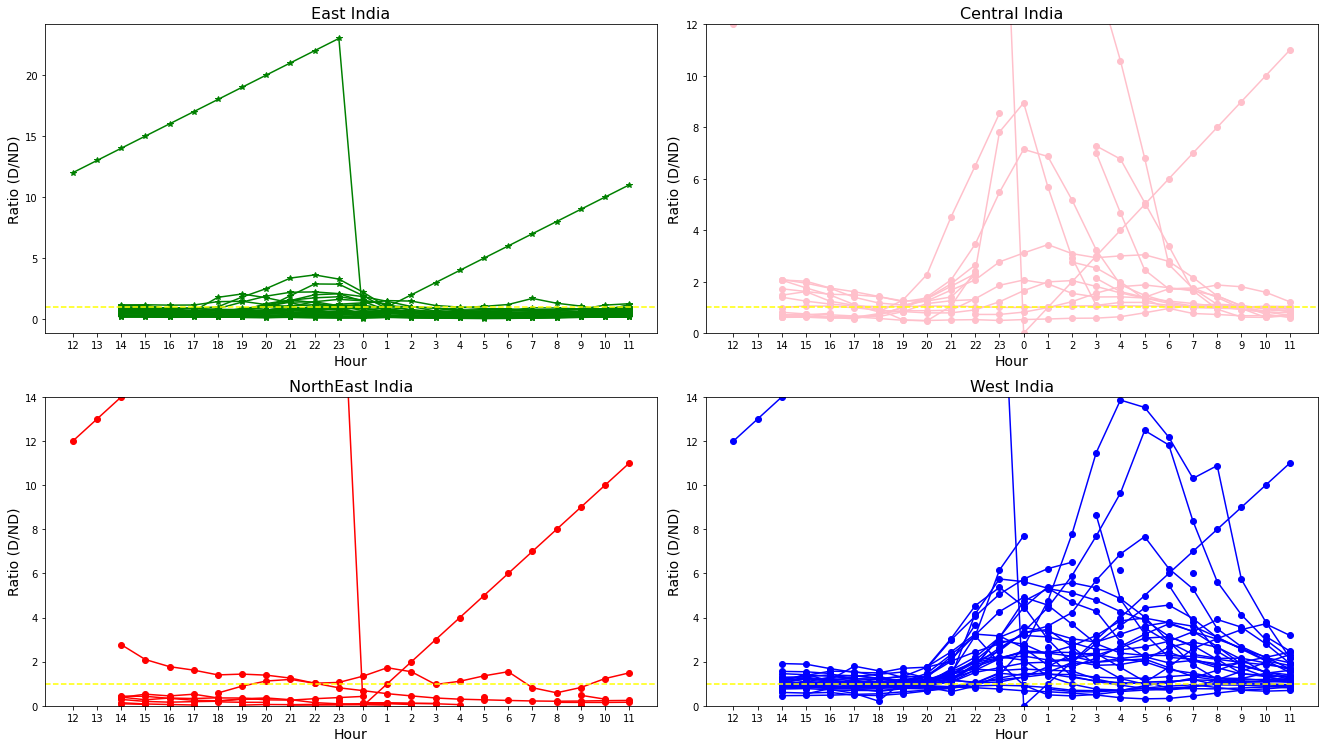

In [37]:
fig = plt.gcf()
plt.figure(1)
#-----------------------
plt.subplot(221)
plt.plot(default_x_ticks, East_Ratio,marker='*',color='green',label='East India')
plt.xticks(default_x_ticks,Hour)
plt.title('East India',fontsize=16)
plt.xlabel("Hour",fontsize=14)
plt.ylabel("Ratio (D/ND)",fontsize=14) # Ratio=1 means D and ND have same concentrations
plt.axhline(y = 1, color = 'yellow', linestyle = '--') # Horizontal mark line for permissible limit.
#-----------------------------------
plt.subplot(224)
plt.plot(default_x_ticks, West_Ratio,marker='o',color='blue',label='West India')
plt.xticks(default_x_ticks,Hour)
plt.title('West India',fontsize=16)
plt.xlabel("Hour",fontsize=14)
plt.ylabel("Ratio (D/ND)",fontsize=14)
plt.ylim(0,14)
plt.axhline(y = 1, color = 'yellow', linestyle = '--')
#----------------------------------------
plt.subplot(223)
plt.plot(default_x_ticks, NorthEast_Ratio,marker='o',color='red',label='NorthEast India')
plt.xticks(default_x_ticks,Hour)
plt.title('NorthEast India',fontsize=16)
plt.xlabel("Hour",fontsize=14)
plt.ylabel("Ratio (D/ND)",fontsize=14)
plt.ylim(0,14)
plt.axhline(y = 1, color = 'yellow', linestyle = '--')
#------------------------------------------
plt.subplot(222)
plt.plot(default_x_ticks, Central_Ratio,marker='o',color='pink',label='Central India')
plt.xticks(default_x_ticks,Hour)
plt.title('Central India',fontsize=16)
plt.xlabel("Hour",fontsize=14)
plt.ylabel("Ratio (D/ND)",fontsize=14)
plt.ylim(0,12)
plt.axhline(y = 1, color = 'yellow', linestyle = '--')

fig.set_size_inches(18.5, 10.5)
plt.savefig('Region.png')
plt.savefig('Region Visual.jpg')